#  Statistical Inference

In statistical inference we investigate data generating processes that are non-deterministic. For this purpose, we assume that each data generating process has an underlying probability distribution, which describes the stochasticity of the data generating process. In statistical inference we usually want to find and describe the probability distribution of a particular data generating process. To this end, we usually assume that the probability distribution we are after belongs to a family of probability distributions which is parametrized by some parameter $\theta \in \Theta$. Our task is now to find the "true" or "most likely" parameter $\theta \in \Theta$ given data from the data generating process.

Statistical inference can be done using different methodologies as well as different interpretations of probability. Different methodologies include 
 * Analytical inference where we calculate our parameter estimates analytically, e.g. by pencil and paper
 * Monte Carlo inference where we calcualte our parameter estimates with the help of random number generators 

The two most often used interpretations of probabilty are 

 * Frequentist approach 
 * Bayesian approach
 
These two approaches differ fundamentally in how they use probability to express uncertainty in their respective statistical models. We will first discuss the frequentist and the Bayesian approach to statistical inference in this notebook before we will see how these conceptional differences lead to different parameter estimates in the *Coin Tossing Example*.  

## Frequentist Approach

In the frequentist's approach to probability the parameter of a statistical model is fixed. We assume that there is only one "true" parameter that characterizes the underlying probability distribution. Our task is to find it. We estimate the "true" parameter by finding the parameter that explains the data $x = x_{i=1, ...,n}$with the highest possible likelihood. Infering this "most plausible" parameter is known as Maximum Likelihood Estimation (MLE). The estimator is known as MLE estimator. 

$$\hat{p}_{MLE} = \underset{\theta \in \Theta}{argmax} p(x; \theta) $$

For MLE, we use only current data and no explicit prior belief about the parameter. In the frequentist's sense, probability is interpreted as the **frequency** of events.   


## Bayesian Approach

In the Bayesian approach, on the other hand, probability represents **one's uncertainty**. We don't assume that the parameters describing underlying probability distributions are fixed. We rather assume that these parameters are non-deterministic - or at least that they present themselfes to us observers as non-deterministic. In this sense, we usually not only derive and calculate point estimates of parameters of interest but we rather infer whole probability distributions over those parameters describing and quantifying the uncertainty we associate with that parameters. Calculating those probability distributions, however, is generally more complicated than calculating point estimates in the MLE setting. This is, because for calculating probability distributions over paramters we need Bayes rule. 

Bayes rule follows from the definition of conditional probability

$$ P(A | B) = \frac{P(A, B)}{P(B)}$$

$$ P(B | A) = \frac{P(A, B)}{P(A)}$$

And rearanging

$$ P(A | B) = \frac{P(B | A) P(A)}{P(B)}$$

where $A \in 𝒜$, $B \in ℬ$ and $𝒜 \times	ℬ$ is the product of measurable spaces 𝒜 and ℬ. The same relationship is also true for probability density functions, i.e. 


$$ p(x | y) = \frac{p(y | x) p(x)}{p(y)}$$

In Bayesian approach to probability we usually have a random sample $x = x_{i=1,...,n}$ drawn from a random variable $X_{\theta}$ whose underlying probability distribution is parametrized by $\theta \in \Theta$. In Bayesian statistics, in contrast to the frequentist's approach to probability, we assume a probability distribution over $\Theta$ as well. In practise, we usually want to find a point estimate $\hat{\theta}$ for the unknown model parameter and its distribution given the data $x = x_{i=1,...,n}$. We can calculate that distribution using Bayes' rule as follows

$$p(\theta | x) =  \frac{p(x | \theta) p(\theta)}{p(x)}$$

The right-hand side of this equation consists of three terms. 

 * $p(x | \theta)$ represents the probability of the data under the model $\theta$. It has a similar form as the likelihood function in the frequentist's MLE setting $p(x; \theta)$ and is thus called **likelihood**
 * $p(x)$ is the probability of observing the data $x$ and is called the **data** term
 * $p(\theta)$ is the probability of the parameter $\theta$ and is called the **prior**
 
The left-hand sind of the equation above, $p(\theta | x)$, is called the **posterior**. 

Since the data term $p(x)$ does not depend on $\theta$ it is often dropped when computing the posterior. This makes life easier since this term can be hard to compute. To compute the marginal probability $p(x)$ we would need to integrate out the parameter $\theta$ like $p(x) = \int_{\theta}p(x|\theta)d\theta$. So it is often enough to compute

$$p(\theta | x) \propto p(x | \theta) p(\theta)$$

In case we really need $p(x | \theta)$, we can understand and calculate $p(x)$ as a normalization constant such that $\int_{\theta}p(x | \theta)d\theta$ = 1. This is rather easy when we approximate $p(\theta | x)$ with Monte Carlo Methods.

Parameter estimation using Bayes' approach through calculating the posterior $p(\theta | x)$ requires/allows us thus to use both 
 * current data $p(x | \theta)$
 * prior knowledge and/or our belief about parameters $p(\theta)$
 
With the Bayesian approach to statistical inference, we don't get a point point estimate for the parameter $\theta$ but rather the whole distribution of $\theta$ in the form of the posterior. If we want to obtain one point estimate of $\theta$, we usually calcualte the Maximum Aposteriory Estimator (MAP), which is defined as

$$\hat{p}_{MAP} = \underset{\theta \in \Theta}{argmax} p(\theta | x) $$



## Coin Tossing Example

In this example we are tossing a coin, which can come up either heads or tails. Let's assume we tossed the coin $n = 10$ times and it came up heads $h = 6$ times. From this data we want to estimate the probability $\theta = p_{head} = p$. First, we estimate $p$ by Maximum Likelihood Estimation. Then, with Bayes approach.


### Frequentist Estimation

We infer $p$ by the Maximum Likelihood Estimator 

$$ \hat{p}_{MLE} = \underset{\theta \in \Theta}{argmax}L(h; n, p) = \underset{\theta \in \Theta}{argmax}log(L(h; n, p)) = \underset{\theta \in \Theta}{argmax}l(h; n, p)$$

The likelihood function is given by 

$$L(h; n, p) = p(h; n, p) = {h\choose n}p^{h}(1-p)^{n-h} $$

And the log-likelihood by

$$l(h; n, p) = log(L(h; n, p)) = log{h \choose n} + h \times log(p) + (n-h)log(1-p)$$

The 1st derivative of the log-likelihood is

$$ \frac{dl(h; n, p)}{dp} = \frac{h}{p} - \frac{n-h}{1-p}$$

And setting it to 0 gives the Maximum Likelihood Estimator

$$ \frac{dl(h; n, p)}{dp} = 0 \Leftrightarrow \frac{h}{p} = \frac{n-h}{1-p} \Leftrightarrow h (1-p) = (n-h) p \Leftrightarrow h-ph = pn-ph \Leftrightarrow $$

$$ \hat{p}_{MLE} = \frac{h}{n} $$

The 2nd derivative of the log-likelihood is

$$ \frac{d^2l(h; n, p)}{{dp}^2} = -hp^{-2} - (n-h) (1-p)^{-2} \leq 0, \forall p \in [0, 1] $$

which means that $\hat{p}_{MLE}$ is the only maximum of the likelihood function. Calculating $\hat{p}_{MLE}$ finally gives

$$ \hat{p}_{MLE} = \frac{h}{n} = \frac{6}{10} = 0.6$$


### Bayes Estimation

We infer $p$ by the Maximum Aposteriori (MAP) Estimator. Instead of using the symbol $p$ we use the symbol $\theta$ to refer to the probability of head coming up in our coin toss example. We do this to avoid confusion with the probability density function (pdf) which is also refered to by $p$.

$$ \hat{p}_{MAP} = \underset{\theta \in \Theta}{argmax} p(\theta|x) = \underset{\theta \in \Theta}{argmax} \frac {p(x|\theta)p(\theta)}{p(x)} = \underset{\theta \in \Theta}{argmax} p(x|\theta)p(\theta) $$

To calculate 

$$ p(\theta|x) = \frac {p(x|\theta)p(\theta)}{p(x)} $$ 

The likelihood term has the same distribution as in the frequentist's approch, this is a Binomial distribution. In order to infer the posterior distribution, we have to assume some prior distribution over the parameter $\theta$. One good choice might be a Beta distribution over $\theta$ since the Beta distribution forms a conjugate prior with the Binomial distribution and yields a Posterior that also has a Beta distribution. This result comes from probability theory and we are not going to reproduce it here. The Beta distribution is parametrized by two parameters a and b and the probability density function of the Beta distribution is given by

$$ p(\theta; a, b) = \theta^{\alpha - 1}(1-\theta)^{\beta -1} $$

for $a, b > 0$ and $\theta \in [0, 1]$. 

Let's plot the pdf of the beta prior for a couple of values for $a$ and $b$.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats

<Figure size 432x288 with 0 Axes>

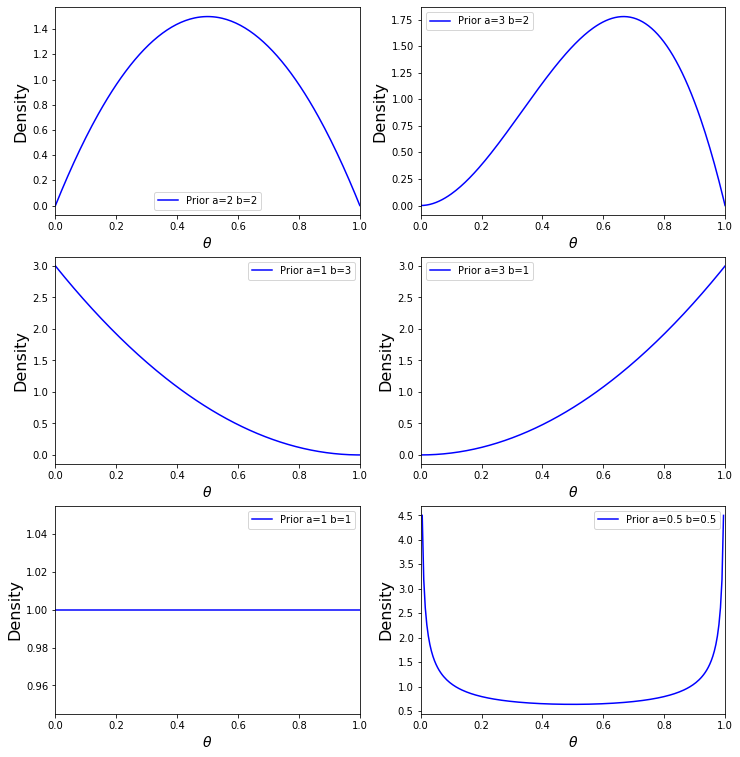

In [2]:
fig = plt.figure()
fig.subplots_adjust(hspace=0.1, wspace=0.3)
plt.figure(figsize=(12, 13))

def beta_prior(a: float, b: float, i: int):
    prior = stats.beta(a, b)
    thetas = np.linspace(0, 1, 200)
    plt.subplot(3, 2, i)
    plt.plot(thetas, prior.pdf(thetas), label=f'Prior a={a} b={b}', c='blue')
    plt.xlim([0, 1])
    plt.xlabel(r'$\theta$', fontsize=14)
    plt.ylabel('Density', fontsize=16)
    plt.legend();
    
beta_prior(a=2, b=2, i=1)
beta_prior(a=3, b=2, i=2)
beta_prior(a=1, b=3, i=3)
beta_prior(a=3, b=1, i=4)
beta_prior(a=1, b=1, i=5)
beta_prior(a=0.5, b=0.5, i=6);

We see that, depending on which values we chose for the parameters $a$ and $b$, the probability density function of the corresponding beta distribution looks quite different. The beta distribution is thus a quite useful distribution to express our prior belief about the parameter $\theta$.

Now we determine and plot the posterior for a couple of different priors and different observed data, i.e. different likelihood terms. This allows us to observe how likelihood and pior interact two determine the posterior.

In [10]:
def beta_binomial(a: float, b: float, n: int, h: int):
    # frequentist
    p = h/n
    rv = stats.binom(n, p)
    mu = rv.mean()
    
    # Bayesian
    prior = stats.beta(a, b)
    post = stats.beta(h+a, n-h+b)
    
    thetas = np.linspace(0, 1, 200)
    map = (h+a-1)/(n+a+b-2)
    mle = mu/n
    plt.figure(figsize=(8, 6))
    plt.plot(thetas, prior.pdf(thetas), label=f'Prior (a={a} b={b})', c='blue')
    plt.plot(thetas, post.pdf(thetas), label='Posterior', c='red')
    plt.plot(thetas, n*stats.binom(n, thetas).pmf(h), label=f'Likelihood (n={n} h={h})', c='green')
    plt.axvline(map, c='red', linestyle='dashed', alpha=0.4, label=f'MAP {map:.2f}')
    plt.axvline(mle, c='green', linestyle='dashed', alpha=0.4, label=f'MLE {mle}')
    plt.xlim([0, 1])
    plt.xlabel(r'$\theta$', fontsize=14)
    plt.ylabel('Density', fontsize=16)
    plt.legend()

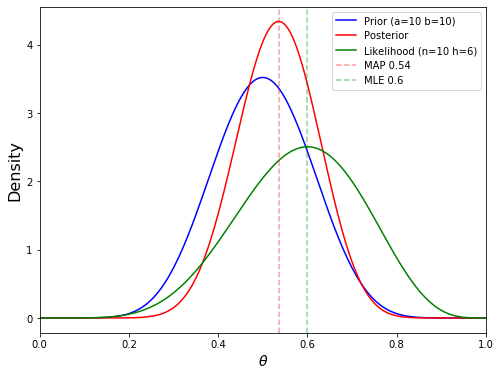

In [11]:
beta_binomial(a=10, b=10, n=10, h=6)

When we look at the first plot with $(a, b, n, h) = (10, 10, 10, 6)$ we see the likelihood function in green with its peak at $0.6$ corresponding to the maximum likelihood estimator $\hat{p}_{MLE}$. The prior in blue is symetric around $0.5$ and expresses our prior believe about to coin to be fair. The posterior is shown in red with its peak at $\hat{p}_{MAP} = 0.54$. We see that $\hat{p}_{MAP}$ is smaller than $\hat{p}_{MLE}$. This is because our prior believe about $\theta$ to be $0.5$ "pulls" the posterior away from the MLE estimator to the left.

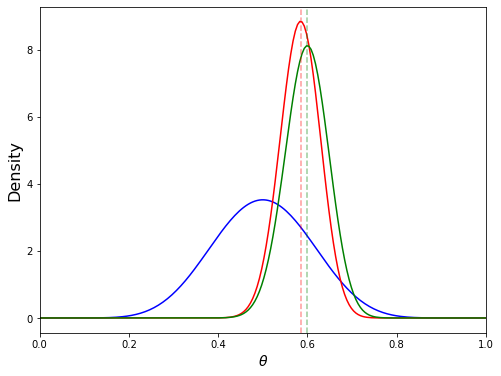

In [5]:
beta_binomial(a=10, b=10, n=100, h=60)

In the second plot we set $(a, b, n, h) = (10, 10, 100, 60)$. This is, we are observing the same frequency of head coming up but instead of 10 we observe 100 coin tosses. The maximum likelihood function still peaks at $0.6$, so the MLE estimator is still $\hat{p}_{MLE} = 0.6$ but the likelihood function is much more centered around $0.6$. This is because we have ten times more data than before and thus we are more "confident" in our estimate. The prior in blue is still the same as in the first plot but the posterior in red is now much closer to the likelihood function. Infact $\hat{p}_{MAP} = 0.58$ compared to $\hat{p}_{MAP} = 0.54$ of before. Why is that? Intuitivevly, we can argue that since we have more data now the likelihood term gets more weight relative to the prior. Thus the prior doesn't pull the posterior away from the MLE estimator as stronlgy as before. Besides, the posterior is also more centered around $\hat{p}_{MAP}$ compared to before. This, too, is because we have more data and are thus more confident in our MAP estimator.

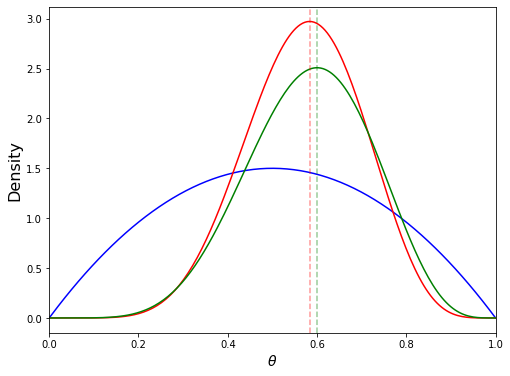

In [6]:
beta_binomial(a=2, b=2, n=10, h=6)

In this third plot with $(a, b, n, h) = (2, 2, 10, 6)$ the likelihood has the same form as in the first example because we are back to $10$ coin tosses in total of which head came up $6$ times. What is different, however, is the prior expressing our prior beliefve about $\theta$. Still it is highest for $\theta = 0.5$. However, this time, we consider other values for $\theta$ much more likely than in the 1st example. This is visible from the greater weight the prior's pdf gives to values for $\theta$ that are farther away from $0.5$. This "weeker" prior pulls the posterior not as strongly to the left as in the 1st example where the difference between $\hat{p}_{MLE}$ and $\hat{p}_{MLE}$ is bigger. Here we observe a MAP of $\hat{p}_{MAP} = 0.58$. This MAP actually takes the same value as in the 2nd example. In the 3rd example, however, it's rather the "week" prior, as opposed to the "strong" likelihood in the 2nd example, that causes the difference in the posterior.

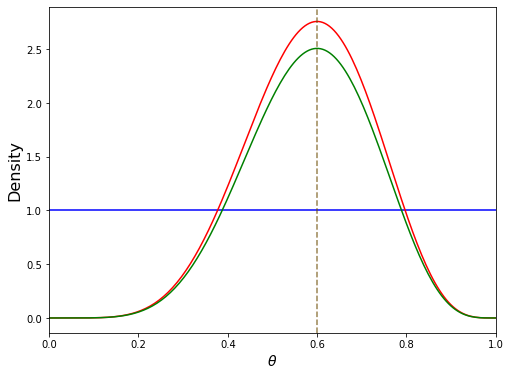

In [7]:
beta_binomial(a=1, b=1, n=10, h=6)

In the fourth plot, we have $(a, b, n, h) = (1, 1, 10, 6)$. As we can see from the plot, the prior is evently distributed in $[0, 1]$ and thus uninformative. This causes the MLE estimator and MAP estimator to agree on the same value of $0.5$. Uninformative priors generally cause the MLE and MAP estimators to agree because the prior does not add additional information when calculating the posterior.

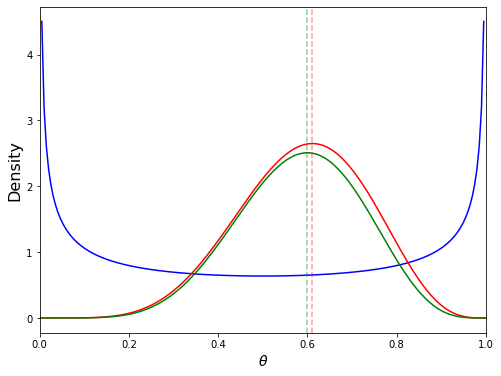

In [8]:
beta_binomial(a=0.5, b=0.5, n=10, h=6)

In the fifth plot, finally, we have $(a, b, n, h) = (0.5, 0.5, 10, 6)$. In the plot we can see that the prior expresses a prior belief that the coin is biassed: either in favour of head or tail. We observe a MAP estimator of $\hat{p}_{MAP} = 0.61$. This time we have $\hat{p}_{MLE} < \hat{p}_{MAP}$. The prior belief of the coin being biased pulls the posterior away from the MLE to the right. This in contrast to the previous examples where the prior expressed a belief that the coin is unbiased and correspondingly pulled the posterior to the left.

Note that in the plots above, the prior in blue and the posterior in red represent probability density functions which integrate to $1$ over $[0, 1]$. The likelihood function in green is not a pdf. We can't use the likelihood function to make statements like $\theta_1$ is twice as likely as $\theta_2$. We can however, use the pdf of the prior and the posterior to make this kind of statements. The possibility to make this kind of statements is thought by some to be an advantage of Bayesian statistics over frequentist statistics.